In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
import warnings
warnings.filterwarnings("ignore")

# Feature Selection with Machine Learning Alrogithms

## Remaining Tasks

- Interpretation of results of Neural Network
- Super Learner Ensemble: research, figure out specifics of how used in corruption paper, implement
- Run each GridSearch 10x and average the final predictors
- Finish data cleaning (ironore/silver variables issue, remaining NAs from year_deforest, repeat in jobs from analysis.Rdata and more specific jobs ones, are there too many job categories?)
- what are n_jobs_ and n_companies_
- once i have the final variable list sorted out, consider model performance score MSE and also covariate groups of variables, see how the paper found the groups and try to replicate

- get rid of jobs overlap variables
- step ahead forecasting

- feature importance while holding certain variables constant (e.g. lat/long)

Methods Used:
- Univariate Test
- RFE
- PCA
- Random Forests * use grid search
- Extra Trees * use grid search
- Lasso Regression ** use grid search
- Gradient Boosting Machine ** use grid search
- Neural Network
- Super Learner Ensemble

Paper Methods
- LASSO (Done)
- Random Forests (Done)
- Gradient Boosting Machine
- Neural Network
- Super Learner Ensemble

## Cross Validation

CV is applied to relevant methods with sklearn's GridSearchCV package. GridSearch tests model performance on all possible values of hyperparameters. 5-fold CV is used here as in the paper. 
- Criterion selected for CV is neg mse instead of their classification-based metric

- What I don't have yet is that they repeat the CV 10 times and use the average of those parameters. Need to write a function and run this. Will probably be better to do this on yale compute

## Import Data and PreProcess

In [16]:
path = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/full_data_2016.csv'
df1 = pd.read_csv(path)

In [17]:
df = df1[df1.year == 2016]

In [20]:
df.shape

(66126, 168)

In [18]:
df.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
0,1400209,-14.0,8483695,-62.175,-0.825,2016,97.0,95.00,37.68456,57.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.636415e+04,497.299835,7.686145e+04
1,1500602,0.0,9120900,-53.325,-7.825,2016,97.0,89.25,27.49327,263.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.236045e+06,7691.796031,1.243737e+06
2,1502707,7.0,9405296,-49.375,-8.225,2016,44.0,36.50,20.84242,328.0,...,0.0,0.0,0.0,59.388681,0.0,0.0,0.0,5.609564e+05,5955.426047,5.669118e+05
3,2106102,7.0,9689708,-45.425,-7.625,2016,18.0,24.00,13.72303,429.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.864789e+04,13451.852302,6.209974e+04
4,1707306,-4.0,9390832,-49.575,-11.425,2016,27.0,30.75,20.98895,193.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.932008e+05,66046.151292,3.592469e+05


In [21]:
Y = df['forest.l']
X = df.drop(['year','forest.diff', 'ID', 'FID', 'x', 'y', 'forest.l', 'nn_forest.l', 'munic_id'], axis=1)

In [23]:
#test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

## Covariance

In [89]:
X_corr.head()

,rain1,elevation,slope,aspect,near_mines,near_roads,near_hidrovia,populacao,pib_pc,silver,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
0,37.68456,57.0,0.0,270.0,227527.400,56253.39,33359.470,20537,15925.377173,551389.625,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7.636415e+04,497.299835,7.686145e+04
1,27.49327,263.0,1.0,45.0,149924.000,140048.20,59134.240,109938,22713.506749,551389.625,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.236045e+06,7691.796031,1.243737e+06
2,20.84242,328.0,4.0,226.0,1072.789,64773.64,13968.640,46485,11689.714919,551389.625,...,0.0,0.0,0.0,59.388681,0.0,0.0,0.0,5.609564e+05,5955.426047,5.669118e+05
3,13.72303,429.0,3.0,115.0,182430.500,16189.72,2460.384,11943,9716.381144,551389.625,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.864789e+04,13451.852302,6.209974e+04
4,20.98895,193.0,0.0,323.0,179977.500,42670.39,101333.000,4725,26586.384550,551389.625,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.932008e+05,66046.151292,3.592469e+05


In [92]:
X_corr = X[['rain1', 'elevation', 'slope', 'aspect', 'near_mines',
       'near_roads', 'near_hidrovia', 
       'populacao', 'pib_pc', 
        'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB',
       'n_companies_PUBLIC ADMIN', 'n_companies_AGRICULTURE',
       'n_companies_FOOD AND DRINKS', 'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 'murder_threats',
       'assassination', 'assassination_attempt', 'f_emitted_count',
       'expen_agri', 'expen_env_man', 'expen_agr_org', 'expen_mining',
       'expen_petrol', 'expen_prom_ani_pro', 'expen_prom_veg_pro',
       'expen_other_agr', 'expen_agr_defense', 'expen_min_fuel',
       'illegal_mining', 'illegal_other', 'illegal_industry', 'audits',
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full']]

In [91]:
corr = X_corr.corr()
corr.style.background_gradient(cmap = 'coolwarm')

## Univariate Test

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [25]:
select = SelectKBest(score_func = f_regression, k = 8)
z = select.fit_transform(X, Y) 

In [26]:
filter = select.get_support()
features = np.array(X.columns)
 
#print("All features:")
#print(features)
 
print("Selected best 8:")
print(features[filter])

Selected best 8:
['rain1' 'elevation' 'near_roads' 'pib_pc' 'ag_jobs'
 'n_companies_AGRICULTURE' 'n_companies_RETAIL' 'n_jobs_AGRICULTURE']


## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# feature extraction
model = LogisticRegression(solver = 'lbfgs')
rfe = RFE(model, 8, step = 4)
fit = rfe.fit(X, Y)

#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

In [ ]:
#top 8 features by RFE 
X.columns[fit.support_]

## PCA

- With PCA we look for directions of highest explained variance in the predictor variables, so we use the entire dataset not the test/train split set

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)

In [30]:
pca = PCA()
x_new = pca.fit_transform(X_scaled)

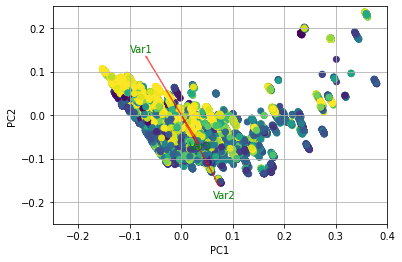

In [31]:
def create_plot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y)
    
    for i in range(3):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.25,0.4)
    plt.ylim(-0.25,0.25)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
create_plot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


In [32]:
pca.explained_variance_ratio_[0:10]

array([0.13075081, 0.06162385, 0.03956524, 0.03608492, 0.02949497,
       0.02738071, 0.02621767, 0.02397177, 0.02204161, 0.0197448 ])

In [33]:
#FIRST PRINCIPAL COMPONENT
#print(abs( pca.components_[0] ))

In [34]:
#most important features as told by first principal component
X.columns[np.argsort(np.array(abs( pca.components_[0] )))[::-1][0:9]]

Index(['n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL',
       'n_companies_TOTAL SERVICE', 'n_companies_HEALTH',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_PUBLIC ADMIN', 'public_jobs',
       'n_jobs_TOTAL', 'n_jobs_REAL ESTATE'],
      dtype='object')

## Random Forests

5.1.2. Random Forests. Random Forests are ensembles of many decision trees, where each one of them is a sequence of rules that divides the sample into sub-groups (called leaves) based on certain variable cutoffs. The prediction for each leaf, in the case of a classification task, is the most common outcome for the trained observations on that leaf, and the trees are fit so as to maximize the information gain of the resulting partitions of the data. Each tree in a Random Forest is constructed by sampling a random subset of the training data and a random subset of the predictors. Each of these trees generates a prediction, and the overall prediction of the Random Forest is the average (or the majority) of the predictions among all trees. **In this application, we keep fixed the number of fitted trees (500) and use cross-validation to determine the optimal number of features available in every node.**

**Here I tuned max_depth. This isn't exactly what they did, but there's not as much flexiblity in sklearn as far as I can tell**

For tree-based models, importance is measured as the information gain, or the homogeneity in the resulting partitions of our set of municipalities, achieved when splitting on each variable.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.inspection import permutation_importance

In [42]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',RandomForestRegressor(n_estimators = 500))
])

In [43]:
search = GridSearchCV(pipeline,
                      {'model__max_depth':np.arange(3,11,8) },
                      cv = 5, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [44]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] model__max_depth=3 ..............................................
[CV] .... model__max_depth=3, score=-313.96852452985104, total= 1.4min
[CV] model__max_depth=3 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ..... model__max_depth=3, score=-300.4761691866164, total= 1.4min
[CV] model__max_depth=3 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


[CV] ..... model__max_depth=3, score=-298.8373280190394, total= 1.4min
[CV] model__max_depth=3 ..............................................
[CV] .... model__max_depth=3, score=-308.45365421857827, total= 1.4min
[CV] model__max_depth=3 ..............................................
[CV] ..... model__max_depth=3, score=-297.0967947548726, total= 1.4min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_s...mators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__max_depth': array([3])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [45]:
search.best_params_

{'model__max_depth': 3}

In [46]:
model = RandomForestRegressor(n_estimators = 500, max_depth = search.best_params_['model__max_depth'])
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
importances = search.best_estimator_._final_estimator.feature_importances_[np.argsort(np.array(abs(search.best_estimator_._final_estimator.feature_importances_)))[::-1][0:9]]
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)[np.argsort(np.array(abs(model.feature_importances_)))[::-1][0:9]]



In [48]:
print(X.columns[np.argsort(np.array(abs(search.best_estimator_._final_estimator.feature_importances_)))[::-1][0:9]])

Index(['rain1', 'n_companies_RETAIL', 'n_companies_WOOD PROD',
       'n_companies_AGRICULTURE', 'elevation', 'ag_jobs',
       'n_companies_AERO TRANSPORT', 'n_companies_WATER-BASED TRANSPORTATION',
       'public_jobs'],
      dtype='object')


## Extra Trees

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

In [50]:
# feature extraction
model = ExtraTreesRegressor(n_estimators=10)
model.fit(X, Y)
#print(model.feature_importances_)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
X.columns[np.argsort(np.array(abs( model.feature_importances_ )))[::-1][0:9]]

Index(['rain1', 'n_jobs_AGRICULTURE', 'n_companies_RETAIL',
       'n_companies_AGRICULTURE', 'elevation', 'n_companies_WOOD PROD',
       'near_roads', 'indigenous_homol', 'near_mines'],
      dtype='object')

## Lasso Regression

5.1.1. Lasso. The LASSO regression, first introduced by (Tibshirani, 1996), is similar to a logistic regression, but adds a penalization term based on the sum of the absolute values of the coefficients. This penalization term aims at shrinking the parameters towards zero. Hence this estimator is similar to a logit model, but it is more parsimonious, adding only those variables that are relevant predictors. One of the advantages of this model is that it is simple and less prone to over-fitting. However, it is incapable of identifying complex relationships between the predictors and our outcome variable, i.e., corruption. **The tuning parameter in the cross-validation is the weight of the penalization term in the objective function (λ), which is optimized over a grid of potential values.**

For the LASSO model the importance is determined by the estimated co- efficients of the regression, where larger parameters (in absolute value) correspond to higher importance.

In [52]:
from sklearn.linear_model import Lasso

In [53]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [54]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [55]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-263.7061243335139, total=   1.1s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ....... model__alpha=0.1, score=-267.0016323729207, total=   0.8s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ....... model__alpha=0.1, score=-261.4688253873803, total=   1.0s
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-277.0792085966873, total=   1.0s
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-261.7224290457022, total=   0.9s
[CV] model__alpha=0.2 ................................................
[CV] ....... model__alpha=0.2, score=-270.8963796849084, total=   0.5s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-271.03721213730415, total=   0.5s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-267.86943484085805, total=   0.5s
[CV] model__alpha=0.2 ................................................
[CV] ....... model__alpha=0.2, score=-283.5432411533679, total=   0.5s
[CV] model__alpha=0.2 ................................................
[CV] .

[CV]  model__alpha=1.2000000000000002, score=-322.680630384402, total=   0.3s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-335.47418083471973, total=   0.3s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-327.43493805361226, total=   0.2s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-330.01700158695536, total=   0.2s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-345.0290219084563, total=   0.3s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-327.4224164153936, total=   0.2s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-339.87157273262324, total=   0.2s
[CV] model__alpha=

[CV]  model__alpha=2.4000000000000004, score=-382.0682435739002, total=   0.2s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-374.625450142299, total=   0.2s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-374.736619978655, total=   0.2s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-391.09316409794724, total=   0.3s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-375.2879743200598, total=   0.2s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-385.54785070684204, total=   0.2s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-378.37224732391695, total=   0.2s
[CV] model__alpha=2.

[CV]  model__alpha=3.5000000000000004, score=-421.94952244235276, total=   0.2s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-419.1342207927537, total=   0.2s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-437.5928499684374, total=   0.3s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-421.6202299650432, total=   0.3s
[CV] model__alpha=3.6 ................................................
[CV] ...... model__alpha=3.6, score=-432.80134284725335, total=   0.3s
[CV] model__alpha=3.6 ................................................
[CV] ...... model__alpha=3.6, score=-426.28442246964465, total=   0.2s
[CV] model__alpha=3.6 ................................................
[CV] ...... model__alpha=3.6, score=-423.49049672834144, total=   0.2s
[CV] model__alpha=3.6 ......................

[CV] ...... model__alpha=4.6, score=-471.30440650564407, total=   0.2s
[CV] model__alpha=4.6 ................................................
[CV] ...... model__alpha=4.6, score=-454.69095641188426, total=   0.2s
[CV] model__alpha=4.7 ................................................
[CV] ...... model__alpha=4.7, score=-462.51402797149024, total=   0.2s
[CV] model__alpha=4.7 ................................................
[CV] ....... model__alpha=4.7, score=-456.6926326928901, total=   0.2s
[CV] model__alpha=4.7 ................................................
[CV] ....... model__alpha=4.7, score=-454.6924455720708, total=   0.2s
[CV] model__alpha=4.7 ................................................
[CV] ....... model__alpha=4.7, score=-474.2715438591666, total=   0.2s
[CV] model__alpha=4.7 ................................................
[CV] ....... model__alpha=4.7, score=-457.6466524950387, total=   0.2s
[CV] model__alpha=4.8 ................................................
[CV] .

[CV] ....... model__alpha=5.8, score=-483.9950974333725, total=   0.2s
[CV] model__alpha=5.8 ................................................
[CV] ....... model__alpha=5.8, score=-480.5365217288141, total=   0.2s
[CV] model__alpha=5.8 ................................................
[CV] ....... model__alpha=5.8, score=-499.2114508512217, total=   0.2s
[CV] model__alpha=5.8 ................................................
[CV] ....... model__alpha=5.8, score=-481.7684388078282, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ...... model__alpha=5.9, score=-490.22275705998186, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ........ model__alpha=5.9, score=-485.856913842426, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ...... model__alpha=5.9, score=-482.30579237107474, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] .

[CV] ....... model__alpha=6.9, score=-501.6274439239642, total=   0.2s
[CV] model__alpha=7.0 ................................................
[CV] ....... model__alpha=7.0, score=-511.2659056267941, total=   0.2s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-508.08855292854196, total=   0.2s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-503.08275874731225, total=   0.2s
[CV] model__alpha=7.0 ................................................
[CV] ....... model__alpha=7.0, score=-521.2286294565939, total=   0.2s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-503.53918221581023, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ....... model__alpha=7.1, score=-513.2936303408766, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] .

[CV] ....... model__alpha=8.1, score=-526.8051627570974, total=   0.2s
[CV] model__alpha=8.1 ................................................
[CV] ........ model__alpha=8.1, score=-544.381119566269, total=   0.2s
[CV] model__alpha=8.1 ................................................
[CV] ....... model__alpha=8.1, score=-526.4506521955836, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] ....... model__alpha=8.2, score=-537.4785330539537, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] ....... model__alpha=8.2, score=-535.5482484959463, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] ....... model__alpha=8.2, score=-529.1337980577117, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] ....... model__alpha=8.2, score=-546.6558991824728, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] .

[CV] ........ model__alpha=9.3, score=-565.109257230513, total=   0.2s
[CV] model__alpha=9.3 ................................................
[CV] ....... model__alpha=9.3, score=-564.3530637792481, total=   0.2s
[CV] model__alpha=9.3 ................................................
[CV] ....... model__alpha=9.3, score=-556.6414617148079, total=   0.2s
[CV] model__alpha=9.3 ................................................
[CV] ....... model__alpha=9.3, score=-573.5474246370494, total=   0.2s
[CV] model__alpha=9.3 ................................................
[CV] ........ model__alpha=9.3, score=-555.380257950888, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ....... model__alpha=9.4, score=-567.7918602483977, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ....... model__alpha=9.4, score=-566.9614147506458, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__alpha': array([0.1, 0.2, ..., 9.8, 9.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [56]:
search.best_params_

{'model__alpha': 0.1}

In [57]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)


In [58]:
X.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

Index(['rain1', 'n_companies_WOOD PROD', 'near_mines', 'n_jobs_AGRICULTURE',
       'emiss_pec_full', 'near_hidrovia', 'near_roads', 'n_jobs_PAPER',
       'n_companies_AGRICULTURE'],
      dtype='object')

In [34]:
#np.array(X.columns)[importance > 0]


In [35]:
#np.array(X.columns)[importance == 0]

## Gradient Boosting Machine

5.1.3. Gradient Boosting Machine. Gradient Boosting Machines (GBM) are ensembles of weak learners, in this case, decision trees. Under boosting, classification algorithms are sequentially applied to a reweighted version of the training data (Friedman et al., 2000). GBM is a variant of Random Forests, in which trees are not fitted randomly nor independently. Instead, each tree is fitted sequentially to the full dataset, in such a way that the weaknesses of trees are identified by using gradients in the loss function, allowing subsequent predictors to learn from the mistakes of the previous ones. In other words, a gradient descent procedure is used to minimize the loss when adding new trees. Consequently, as opposed to Random Forests, observations are not selected via bootstraping, but as a function of past errors. In this way, the addition of each tree offers a slight improvement in the model (Freund et al., 1999). **In our models, we keep fixed the learning rate (shrinkage parameter) and the minimum number of observations in the terminal nodes to avoid overfitting, and use cross-validation to determine the optimal number of trees and the interaction depth.**

- figure out what learning rate they used, I did 0.1
- figure out what they used for min_samples_leaf

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',GradientBoostingRegressor(learning_rate = 0.1, min_samples_leaf = 2))
])

In [61]:
search = GridSearchCV(pipeline,
                      {'model__n_estimators':np.arange(100, 300, 50), 'model__max_depth':np.arange(3, 6, 1)},
                      cv = 5, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [62]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__max_depth=3, model__n_estimators=100 .....................
[CV]  model__max_depth=3, model__n_estimators=100, score=-182.83682294690146, total=  15.3s
[CV] model__max_depth=3, model__n_estimators=100 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV]  model__max_depth=3, model__n_estimators=100, score=-181.86945889858367, total=  15.3s
[CV] model__max_depth=3, model__n_estimators=100 .....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.0s remaining:    0.0s


[CV]  model__max_depth=3, model__n_estimators=100, score=-173.49613187731734, total=  15.1s
[CV] model__max_depth=3, model__n_estimators=100 .....................
[CV]  model__max_depth=3, model__n_estimators=100, score=-190.2103707917516, total=  15.0s
[CV] model__max_depth=3, model__n_estimators=100 .....................
[CV]  model__max_depth=3, model__n_estimators=100, score=-176.8393358446746, total=  15.4s
[CV] model__max_depth=3, model__n_estimators=150 .....................
[CV]  model__max_depth=3, model__n_estimators=150, score=-172.44358084767237, total=  22.7s
[CV] model__max_depth=3, model__n_estimators=150 .....................
[CV]  model__max_depth=3, model__n_estimators=150, score=-171.86765830196802, total=  22.4s
[CV] model__max_depth=3, model__n_estimators=150 .....................
[CV]  model__max_depth=3, model__n_estimators=150, score=-164.04351206311782, total=  23.4s
[CV] model__max_depth=3, model__n_estimators=150 .....................
[CV]  model__max_depth=3

[CV]  model__max_depth=5, model__n_estimators=200, score=-138.53417362975745, total= 1.1min
[CV] model__max_depth=5, model__n_estimators=200 .....................
[CV]  model__max_depth=5, model__n_estimators=200, score=-127.82609185287238, total= 1.1min
[CV] model__max_depth=5, model__n_estimators=250 .....................
[CV]  model__max_depth=5, model__n_estimators=250, score=-128.93933620660442, total= 1.4min
[CV] model__max_depth=5, model__n_estimators=250 .....................
[CV]  model__max_depth=5, model__n_estimators=250, score=-126.60394634342168, total= 1.4min
[CV] model__max_depth=5, model__n_estimators=250 .....................
[CV]  model__max_depth=5, model__n_estimators=250, score=-126.11573422305335, total= 1.5min
[CV] model__max_depth=5, model__n_estimators=250 .....................
[CV]  model__max_depth=5, model__n_estimators=250, score=-135.19522589275738, total= 1.5min
[CV] model__max_depth=5, model__n_estimators=250 .....................
[CV]  model__max_depth

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 44.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
   ...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__n_estimators': array([100, 150, 200, 250]), 'model__max_depth': array([3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [63]:
search.best_params_

{'model__max_depth': 5, 'model__n_estimators': 250}

In [64]:
coefficients = search.best_estimator_.named_steps['model'].feature_importances_
importance = np.abs(coefficients)



In [65]:
X.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

Index(['rain1', 'near_mines', 'near_hidrovia', 'elevation', 'near_roads',
       'aspect', 'n_companies_WOOD PROD', 'pib_pc', 'indigenous_homol'],
      dtype='object')

## Neural Network

5.1.4. Neural Networks. Neural networks model the relationship between input and output signals through models that mimic the way biological brains work. In particular, neural networks are composed of three basic elements: an activation function, that for each neuron, transforms the weighted average of input signals (predictors) into an output signal; a network topology, which is composed by the number of neurons, layers, and connections used by the model; and a training algorithm, which determines the way in which connection weights are set with the task of activating or not neurons as a function of the input signals. This process determines the final prediction of the model. The most common activation functions include the logistic sigmoid, linear, saturated linear, hyperbolic tangent, and Gaussian (Radial Basis) functions. In the end, the process entails an optimization problem in which the optimal weights of the input signals are determined for each node. **In this analysis, we keep fixed a logistic activation function and use cross-validation to determine the optimal number of units in the hidden layer (size) and the regularization parameter (decay).**


In the case of neural networks, importance is determined by the weights that connect neurons within the network.

In [66]:
from sklearn.neural_network import MLPRegressor

In [67]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model', MLPRegressor(activation = 'logistic', random_state=42))
])

In [68]:
#search = GridSearchCV(pipeline,
#                      {'model__hidden_layer_sizes':[(50,),(100,),(150, )], 'model__alpha':np.arange(0.00001, 0.001, 0.0001)},
#                      cv = 5, scoring = "neg_mean_squared_error",verbose = 3
#                      )

In [69]:
search = GridSearchCV(pipeline,
                      {'model__hidden_layer_sizes':[(50,),(100,)], 'model__alpha':np.arange(0.00001, 0.001, 0.001)},
                      cv = 5, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [70]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(50,) .............
[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(50,), score=-154.24582861683962, total=  18.7s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(50,) .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(50,), score=-149.31950235010748, total=  18.6s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(50,) .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.4s remaining:    0.0s


[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(50,), score=-148.87226019100768, total=  18.7s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(50,) .............
[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(50,), score=-159.4247305759303, total=  18.7s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(50,) .............
[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(50,), score=-144.70181608659124, total=  18.9s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(100,) ............
[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(100,), score=-138.323460218438, total=  27.5s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(100,) ............
[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(100,), score=-140.42822854687176, total=  26.9s
[CV] model__alpha=1e-05, model__hidden_layer_sizes=(100,) ............
[CV]  model__alpha=1e-05, model__hidden_layer_sizes=(100,), score=-137.08618880870011, total=  26.2s
[CV] model__alpha=1e-05, model__hidden_layer_

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learnin...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__hidden_layer_sizes': [(50,), (100,)], 'model__alpha': array([1.e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [74]:
search.best_estimator_.named_steps['model'].coefs_

[array([[ 4.09610069,  1.64845417,  3.58091738, ...,  3.07679712,
          2.42112334,  1.67525297],
        [ 1.51250598,  2.22605413,  0.24503438, ..., -0.26354347,
         -3.94920114, -0.32249316],
        [-1.3033298 , -1.15104883, -0.09217003, ..., -0.23011242,
         -0.50522084, -0.20466162],
        ...,
        [ 0.86258259,  0.2594491 ,  0.50334214, ...,  1.71967021,
         -0.07150998,  0.01483563],
        [ 0.25421261, -0.89828843,  0.04963496, ..., -0.15991286,
          0.73750726, -0.32429905],
        [ 0.97827038,  0.09546991,  0.52721261, ...,  1.68421128,
          0.00478496, -0.09879168]]),
 array([[ 2.06984155],
        [ 2.64166506],
        [ 1.19728795],
        [ 1.61199186],
        [ 2.07502705],
        [ 3.14937524],
        [ 1.29865617],
        [ 3.13967824],
        [ 1.52289314],
        [ 1.38853015],
        [ 1.79410383],
        [ 0.68490428],
        [ 0.36638084],
        [-4.26855252],
        [ 2.19486423],
        [ 1.38755595],
     

In [71]:
coefficients = search.best_estimator_.named_steps['model'].coefs_
importance = np.abs(coefficients)



In [96]:
#X.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

## Super Learner Ensemble

5.1.5. Super Learner Ensemble. Ensembles are collections of predictors which are grouped to each other in order to give a final prediction. It is usually the case that ensembles— as they result from the combination of different models—perform better than their individual components. For our analysis, we use the Super Learner ensemble method developed by Polley et al. (2011), which finds an optimal combination of individual prediction models by minimizing the cross-validated out-of-bag risk of these predictions. It has been shown that the Super Learner performs asymptotically as well as the best possible weighted combination of its constituent algorithms (Van der Laan et al., 2007). We use the Super Learner models not only to stack the individual predictions, but also to test for the relative importance of different groups of variables to predict corruption.

In [160]:
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [ ]:
#feed in the predictions for forest loss from each of the methods used above
#do I feed in the best parameters of each one? probably but double check

In [97]:
def get_models():
    models = list()
    models.append(Lasso())
    models.append(RandomForestRegressor(n_estimators=10))
    models.append(GradientBoostingRegressor(learning_rate = 0.1, min_samples_leaf = 2))
    models.append(MLPRegressor(activation = 'logistic', random_state=42))
    return models

In [ ]:
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    
    # define split of data
    kfold = KFold(n_splits=5, shuffle=True)
    
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)